# 의문점 : 넷플릭스는 왜 이렇게 옛날 거 밖에 없을까? 요즘 애들은 그런 걸 좋아하나?

In [95]:
!pip install matplotlib


You should consider upgrading via the '/Users/taekkim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [96]:
!pip install pandas

You should consider upgrading via the '/Users/taekkim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [97]:
!pip install seaborn

You should consider upgrading via the '/Users/taekkim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [98]:
!pip install cutecharts

You should consider upgrading via the '/Users/taekkim/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [99]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [100]:
import cutecharts.charts as ctc

# netflix data 불러오기

In [101]:
PATH = os.getenv("HOME") + "/hakathon/data/"
csv_path = PATH + 'netflix_titles.csv'
data = pd.read_csv(csv_path)
data_copy=data.copy()
df = pd.DataFrame(data)
df['date_added'] = pd.to_datetime(df['date_added'])
csv_path = PATH + "netflix_stockprice.csv"
data2 = pd.read_csv(csv_path)
data2_copy=data2.copy()
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'])
df_titles_stockprice = pd.merge(df, df2, left_on='date_added', right_on='Date', how='inner')
csv_path = PATH + "rate_only.csv"
data3 = pd.read_csv(csv_path)
data3_copy=data3.copy()
df3 = pd.DataFrame(data3)
df3['date_added'] = pd.to_datetime(df3['date_added'])
# 원본 + 주가 데이터에 평점 데이터까지 합치기
df_titles_rating_stockprice = pd.merge(df3, df2, left_on='date_added', right_on='Date', how='inner')
csv_path = PATH + "SPX_500_Data.csv"
data4 = pd.read_csv(csv_path)
data4_copy=data4.copy()
df4 = pd.DataFrame(data4)
df4.tail()

# df4 형식 datetime64로 맞춰주기
df4['Date'] = pd.to_datetime(df4['Date'])

# 원본 + 주가 + 평점 데이터에 S&P500 데이터까지 합치기 -> 겹치는 column명은 _x, _y로 라벨링됨
df_titles_rating_stockprice_SP500 = pd.merge(df_titles_rating_stockprice, df4, left_on='date_added', right_on='Date', how='inner')

In [102]:
df_copy = df.copy()
df = df_titles_rating_stockprice_SP500
df.head()

,Unnamed: 0,show_id,type,title,director_x,cast,country_x,date_added,release_year,rating,...,Adj Close_x,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,% Gain/Loss (Close),% Price Variation
0,7,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,2021-09-16,2001,R,...,586.500000,2021-09-16,4477.09,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
1,8,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,...,577.760010,2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2,9,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,...,598.719971,2021-09-10,4506.92,4520.47,4457.66,4458.58,4458.58,2851140000,-0.7783,0.014
3,10,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,...,598.719971,2021-09-10,4506.92,4520.47,4457.66,4458.58,4458.58,2851140000,-0.7783,0.014
4,11,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,...,598.719971,2021-09-10,4506.92,4520.47,4457.66,4458.58,4458.58,2851140000,-0.7783,0.014


In [103]:
df.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director_x', 'cast',
       'country_x', 'date_added', 'release_year', 'rating', 'duration_x',
       'listed_in', 'description_x', 'imdb_title_id', 'original_title', 'year',
       'date_published', 'genre', 'duration_y', 'country_y', 'language',
       'director_y', 'writer', 'production_company', 'actors', 'description_y',
       'avg_vote', 'votes', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'reviews_from_users',
       'reviews_from_critics', 'weighted_average_vote', 'total_votes',
       'mean_vote', 'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7',
       'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_v

In [104]:
df.drop(columns=['Unnamed: 0','show_id'], inplace=True)
df.head()

,type,title,director_x,cast,country_x,date_added,release_year,rating,duration_x,listed_in,...,Adj Close_x,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,% Gain/Loss (Close),% Price Variation
0,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,2021-09-16,2001,R,122 min,"Dramas, Thrillers",...,586.500000,2021-09-16,4477.09,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
1,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182 min,"Dramas, International Movies",...,577.760010,2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas",...,598.719971,2021-09-10,4506.92,4520.47,4457.66,4458.58,4458.58,2851140000,-0.7783,0.014
3,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas",...,598.719971,2021-09-10,4506.92,4520.47,4457.66,4458.58,4458.58,2851140000,-0.7783,0.014
4,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas",...,598.719971,2021-09-10,4506.92,4520.47,4457.66,4458.58,4458.58,2851140000,-0.7783,0.014


In [105]:
df['release_year'].value_counts()

2018    322
2019    263
2017    241
2016    229
2015    163
2020    144
2014    102
2021     81
2012     79
2013     65
2010     60
2011     44
2009     42
2008     36
2004     29
2007     27
2006     27
2003     20
1997     20
2005     20
2002     18
1999     13
1995     10
2001     10
2000     10
1990      9
1998      8
1976      7
1982      6
1996      6
1981      5
1994      5
1977      4
1973      4
1985      4
1991      4
1979      3
1984      3
1993      3
1972      3
1980      2
1962      2
1958      2
1974      2
1983      2
1975      2
1992      2
1986      2
1964      2
1946      2
1960      1
1970      1
1956      1
1969      1
Name: release_year, dtype: int64

In [106]:
df_bool = df['release_year'].value_counts() > 5
df_bool

2018     True
2019     True
2017     True
2016     True
2015     True
2020     True
2014     True
2021     True
2012     True
2013     True
2010     True
2011     True
2009     True
2008     True
2004     True
2007     True
2006     True
2003     True
1997     True
2005     True
2002     True
1999     True
1995     True
2001     True
2000     True
1990     True
1998     True
1976     True
1982     True
1996     True
1981    False
1994    False
1977    False
1973    False
1985    False
1991    False
1979    False
1984    False
1993    False
1972    False
1980    False
1962    False
1958    False
1974    False
1983    False
1975    False
1992    False
1986    False
1964    False
1946    False
1960    False
1970    False
1956    False
1969    False
Name: release_year, dtype: bool

In [107]:
mean_df = df.groupby(['release_year']).mean()
mean_df

,duration_y,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,...,Volume_x,Adj Close_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,% Gain/Loss (Close),% Price Variation
release_year,,,,,,,,,,,,,,,,,,,,,
1946,96.500000,5.700000,1334.500000,NaN,109.000000,13.000000,5.700000,1334.500000,6.300000,7.000000,...,3.888200e+06,147.809998,2364.820000,2370.350000,2362.600000,2362.720000,2362.720000,3.354110e+09,-0.226000,0.003000
1956,94.000000,6.100000,1910.000000,NaN,54.000000,54.000000,6.100000,1910.000000,6.100000,6.000000,...,4.277600e+06,449.869995,3101.640000,3120.000000,3093.510000,3115.340000,3115.340000,4.429030e+09,0.059400,0.009000
1958,98.500000,6.450000,9714.000000,82.000000,73.500000,40.000000,6.450000,9714.000000,6.650000,6.500000,...,5.594300e+06,286.809998,3050.720000,3066.950000,3050.720000,3066.910000,3066.910000,3.930200e+09,0.957000,0.005000
1960,167.000000,7.400000,407.000000,NaN,7.000000,2.000000,7.400000,407.000000,7.500000,8.000000,...,3.713300e+06,323.570007,3215.180000,3231.720000,3212.030000,3230.780000,3230.780000,2.893810e+09,0.293700,0.006000
1962,145.000000,7.250000,70821.000000,62.500000,246.500000,82.500000,7.250000,70821.000000,7.350000,7.500000,...,5.594300e+06,286.809998,3050.720000,3066.950000,3050.720000,3066.910000,3066.910000,3.930200e+09,0.957000,0.005000
1964,204.000000,7.650000,43156.500000,95.000000,170.500000,47.500000,7.650000,43156.500000,7.750000,8.000000,...,3.825950e+06,431.494995,3603.980000,3626.175000,3602.405000,3625.325000,3625.325000,3.522525e+09,0.731200,0.006500
1969,138.000000,4.200000,1870.000000,NaN,24.000000,5.000000,4.200000,1870.000000,4.900000,5.000000,...,3.896300e+06,162.990005,2415.650000,2430.060000,2413.540000,2430.060000,2430.060000,3.857140e+09,0.751400,0.007000
1970,104.000000,6.400000,1598.000000,50.000000,12.000000,13.000000,6.400000,1598.000000,6.700000,7.000000,...,4.277600e+06,449.869995,3101.640000,3120.000000,3093.510000,3115.340000,3115.340000,4.429030e+09,0.059400,0.009000
1972,123.666667,7.233333,3661.000000,52.000000,51.666667,21.666667,7.233333,3661.000000,7.366667,7.666667,...,4.340300e+06,311.316671,3160.360000,3176.796667,3158.260000,3176.156667,3176.156667,3.239273e+09,0.514800,0.005667


In [108]:
for idx, col in enumerate(df['Date_x']):
    df.at[idx, 'year_month_x'] = col.strftime('%Y%m')

df['year_month_x']

0       202109
1       202109
2       202109
3       202109
4       202109
         ...  
2168    201611
2169    201912
2170    201906
2171    201508
2172    201603
Name: year_month_x, Length: 2173, dtype: object

In [109]:
date_df = df.groupby('year_month_x').mean()
date_df

,release_year,duration_y,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,...,Volume_x,Adj Close_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,% Gain/Loss (Close),% Price Variation
year_month_x,,,,,,,,,,,,,,,,,,,,,
201211,2012.000000,84.000000,5.500000,20039.000000,52.000000,76.000000,137.000000,5.500000,20039.000000,5.700000,...,2.691080e+07,11.397143,1374.640000,1380.130000,1352.500000,1355.490000,1355.490000,4.109510e+09,-1.404700,0.020000
201401,2013.000000,128.000000,6.950000,29285.000000,74.000000,101.500000,178.000000,6.950000,29285.000000,7.000000,...,1.641710e+07,47.148571,1844.230000,1846.040000,1835.230000,1838.700000,1838.700000,3.626120e+09,-0.391000,0.006000
201504,2014.000000,105.000000,5.500000,105.000000,NaN,7.000000,NaN,5.500000,105.000000,7.800000,...,1.045009e+08,80.292854,2105.960000,2111.300000,2100.020000,2104.990000,2104.990000,3.434120e+09,-0.077900,0.005000
201506,2015.000000,90.000000,6.200000,4552.000000,59.000000,57.000000,22.000000,6.200000,4552.000000,6.400000,...,1.562610e+07,97.312859,2123.160000,2128.030000,2119.890000,2124.200000,2124.200000,3.091190e+09,0.063500,0.004000
201507,2014.333333,88.333333,5.900000,30799.000000,58.000000,193.666667,65.666667,5.900000,30799.000000,6.433333,...,1.860737e+07,105.017619,2103.680000,2112.733333,2099.476667,2107.246667,2107.246667,3.228527e+09,0.219633,0.006667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202105,2017.914286,99.342857,5.834286,10473.371429,55.090909,60.857143,40.857143,5.834286,10473.371429,6.165714,...,3.214889e+06,498.003142,4164.679143,4189.006571,4148.322286,4172.495143,4172.495143,3.832081e+09,0.247471,0.009800
202106,2012.509804,101.529412,5.852941,24826.411765,56.842105,91.562500,50.333333,5.852941,24826.411765,6.241176,...,3.129053e+06,505.298039,4227.811569,4240.147843,4216.522157,4230.466863,4230.466863,4.324316e+09,0.133820,0.005804
202107,2011.741379,104.275862,5.643103,77403.448276,52.322581,293.481481,120.830189,5.643103,77403.448276,5.970690,...,2.910822e+06,533.501197,4331.880517,4346.803621,4317.165862,4338.032241,4338.032241,3.131645e+09,0.179483,0.007069


In [114]:
freq_df = df.groupby('year_month_x').count()
freq_df

,type,title,director_x,cast,country_x,date_added,release_year,rating,duration_x,listed_in,...,Adj Close_x,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,% Gain/Loss (Close),% Price Variation
year_month_x,,,,,,,,,,,,,,,,,,,,,
201211,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
201401,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
201504,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
201506,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
201507,3,3,2,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202105,35,35,22,30,28,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
202106,51,51,46,51,36,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
202107,58,58,47,58,52,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58


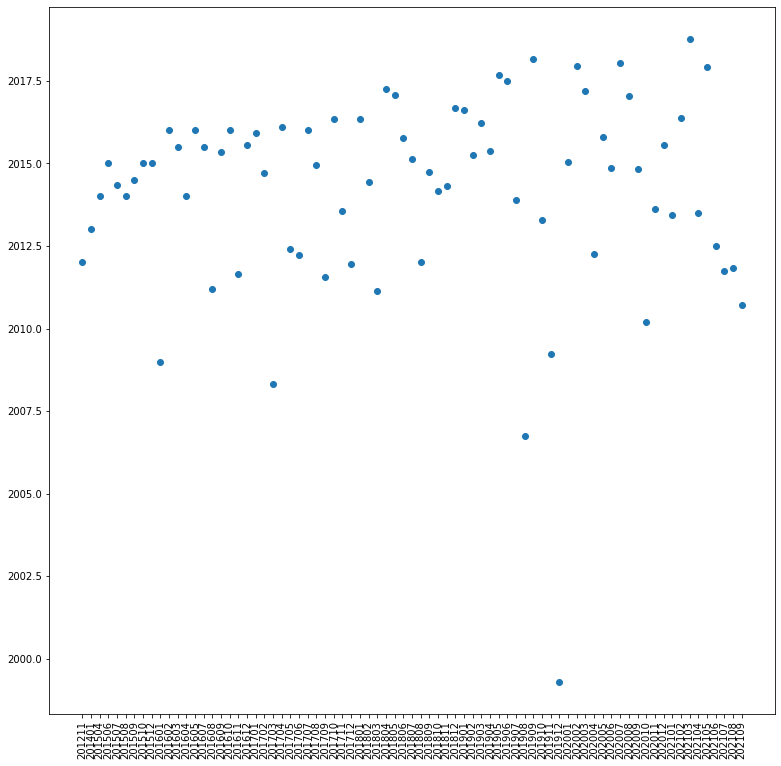

In [116]:
release_year_date_df = date_df['release_year']
plt.figure(figsize=(13,13))
plt.scatter(release_year_date_df.index, release_year_date_df)
plt.xticks(rotation=90)
plt.show()

In [111]:
df['date_added'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
2168    2016
2169    2019
2170    2019
2171    2015
2172    2016
Name: date_added, Length: 2173, dtype: int64

ValueError: x and y must be the same size

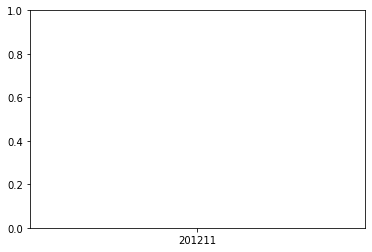

In [112]:
plt.scatter(date_df.index, date_df)
plt.show()

In [ ]:
mean_df.columns

In [ ]:
mean_df_min_5 = mean_df[df_bool]
mean_df_min_5

In [ ]:
plt.scatter(mean_df_min_5.index, mean_df_min_5)
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#시간별로 vote 수
popular=pd.read_csv(PATH + "popular_des2.csv",index_col=0)
no_popular = pd.read_csv(PATH + "non_popular_des2.csv",index_col=0)

In [ ]:
popular[:5]

In [ ]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

In [ ]:
popular_list = popular.values.tolist()
no_popular_list = no_popular.values.tolist()
popular_list[:5]

In [ ]:
import itertools
popular_list =list(itertools.chain.from_iterable(popular_list))
no_popular_list=list(itertools.chain.from_iterable(no_popular_list))

In [ ]:
#텍스트 전처리
news_df = pd.DataFrame({'document':no_popular_list})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
news_df['clean_doc'][1]

In [ ]:
import nltk
nltk.download('stopwords')
  
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [ ]:
print(tokenized_doc[1])

In [ ]:
#3) TF-IDF 행렬 만들기
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
news_df['clean_doc'][1]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

In [ ]:
np.shape(svd_model.components_)


In [ ]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

In [ ]:
tokenized_doc[:5]

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0


In [ ]:
print(dictionary[66])

In [ ]:
len(dictionary)

In [ ]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
print(ldamodel.print_topics())

In [ ]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

In [ ]:
plt.figure(figsize = (50, 20))
plt.subplot(2,2,1)
sns.scatterplot(x='Date_x', y='allgenders_0age_avg_vote', data=df_titles_rating_stockprice_SP500, color='r', s=200)
plt.subplot(2,2,2)
sns.scatterplot(x='Date_x', y='allgenders_18age_avg_vote', data=df_titles_rating_stockprice_SP500, color='y', s=200)
plt.subplot(2,2,3)
sns.scatterplot(x='Date_x', y='allgenders_30age_avg_vote', data=df_titles_rating_stockprice_SP500, color='g', s=200)
plt.subplot(2,2,4)
sns.scatterplot(x='Date_x', y='allgenders_45age_avg_vote', data=df_titles_rating_stockprice_SP500, color='k', s=200)

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.scatterplot(x='release_year', y='allgenders_0age_avg_vote', data=df_titles_rating_stockprice_SP500, color='r', s=20)
plt.subplot(2,2,2)
sns.scatterplot(x='release_year', y='allgenders_18age_avg_vote', data=df_titles_rating_stockprice_SP500, color='y', s=20)
plt.subplot(2,2,3)
sns.scatterplot(x='release_year', y='allgenders_30age_avg_vote', data=df_titles_rating_stockprice_SP500, color='g', s=20)
plt.subplot(2,2,4)
sns.scatterplot(x='release_year', y='allgenders_45age_avg_vote', data=df_titles_rating_stockprice_SP500, color='k', s=20)

빨강 --> 18세 미만 청소년층은 고르게 분포되며 1점, 10점 평점을 많이 준다 (취향이 뚜렷하다, 대체로 긍정적이지만 극단적임)

노랑 --> 18-30세 청년층은 평점이 청소년에 비해서 약간 좁아지되 극단적 긍부정은 없고 대체로 5-8점에 분포하지만 10대에 비해 비판(2~4점)도 어느 정도 한다 (대체로 긍정적이고 비판도 함) 

초록 --> 30-45세 중년층은 평점이 대체로 4~8점 중간 쪽에 좁아져 분포되어 있다 (다수를 따르는 취향, 대체로 무난)

검정 --> 45세 이상 장년층은 중년층과 비슷하지만 영화를 많이 보며 뻔하다고 느껴서인지 아래 쪽으로 다소 쏠려 있다 (냉철하다, 대체로 부정적)


# 개봉연도 - 연령대별 평점 


--> 

넷플릭스는 대체로 컨텐츠 수가 많고 복고 컨텐츠까지 풍부하게 추가한다

디즈니플러스는 처음에 많은 수의 고품질 기존 컨텐츠를 등록했지만 신규 컨텐츠는 적다

복고 컨텐츠 전략을 확인하기에는 디즈니+가 2019년부터여서 데이터가 너무 적다

# Content Type on Netflix
content_type = df['type'].value_counts().to_frame(name="count")

# donut chart
pie = ctc.Pie('Content type on Netflix', # title
              width='720px',height='720px')

# set the chart options
pie.set_options(labels=list(content_type.index), # country names as labels
                inner_radius=0,                  # inner radius set to 0
                colors=['#ee333c','#168ab5'])


pie.add_series(list(content_type['count']))

# display the charts
pie.render_notebook()


In [ ]:
# netflix 주가&거래량 데이터 불러오기


In [ ]:
# dtype 맞춰 주고 데이터 합치기

In [ ]:

fig, axe1 = plt.subplots(figsize = (20, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_stockprice, x = 'Date', y = 'release_year', color = 'g', s=10)
c2 = sns.lineplot(ax = axe2, data = df_titles_stockprice, x = 'Date', y = 'Adj Close', color = 'b')

axe1.legend(['release year','Stock Price'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('release year')
axe2.set_ylabel('Stock Price')

--> 대체로 Movie에 따라감, 초반 빼고는 별 차이가 없음



--> 안 찍힘? 발매연도 대신 평점, 주제(description sentiment 분석)와의 관계도 봐야함 + 거래량 대신 실적과도 + 디즈니 등 다른 곳 영화들도 (복고 등) + 평 좋은 영화 감독/배우 몇명 집어서 주가.거래량.실적과 비교(흥행보증수표)

S&P 500 등 평균그래프도

실제 뉴스, 리포트와 비교(전략, 성공요인 맞는지) + 그래프 미화

넷플릭스 : 양은 많은데 질이 떨어진다
디즈니 : 질은 좋은데 양이 없다

In [ ]:
# 평점 데이터 합친 netflix_titles + netflix_imdb 불러오기


fig, axe2 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨, 숫자 바꿔주기
axe3 = axe2.twinx() # 숫자 바꿔주기

c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')

axe2.legend(['Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')


In [ ]:
--> 2018초, 2019초, 2020초에 Netflix가 S&P500 대비 초과상승

19년 말에 S&P500은 오르는데 netflix 주가는 떨어지는 교차 부분 존재 : 디즈니+ 등 경쟁자 등장 


# 개봉연도 - 주가(S&P500포함)

fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'release_year', color = 'r', s=10)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['개봉연도', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')

In [ ]:
# 평점 - 주가 관계

fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice, x = 'Date', y = 'weighted_average_vote', color = 'g', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['평점', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')



--> 전체 평점 : 위, 아래 적고 중간 값이 많다 

1. 4~8점 사이 중간대 점수를 주는 사람
3. 나머지 사람
순으로 많다

19년 중반 교차 부분에서는 부정적 평가가 다소 늘어난다

상관관계 찾기 어렵다... 주가와 가장 상관관계 있는 성별/연령대별 평점은?


# 연령대별 평점 특징


In [ ]:
--> 청소년층은 그나마 최신 컨텐츠에 10점을 주기도 하지만, 모든 층에서 복고 컨텐츠에 중~중상의 평점을 부여한다. 다만 특히 부정적 평가는 청,중,장년층에서 최신 컨텐츠에 쏠려 있으므로 오히려 복고 컨텐츠가 무난 혹은 좋은 평점을 받는다고 볼 수 있다. 최신 컨텐츠에 비해 검증되고 엄선된 명작 컨텐츠만 추가되어서 그런지는 몰라도 어쨌든 

복고 컨텐츠는 통한다!




# 18세 미만 청소년층 평점 - 주가

fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_0age_avg_vote', color = 'r', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['청소년층 평점', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('청소년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')


In [ ]:
--> 18세 미만 평점 : 
1. 5~8점 사이 괜찮은 점수를 주는 사람
2. 1점, 10점 극단적 점수를 주는 사람
3. 8~10점 사이 후한 점수를 주는 사람
4. 1~5점 사이 박한 점수를 주는 사람
순으로 많다

--> 10점 평점 작품의 등장, 밀도가 높은 구간에 주가 상승, 밀도가 낮은 구간에서 주가 하락이 보여진다 (트렌드에 민감한 세대)



# 18-30세 청년층 평점 - 주가

fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_18age_avg_vote', color = 'y', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['청년층 평점','Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('청년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')


In [ ]:
--> 대체로 부정적(2~4점) 평가가 많은 시기에 주가 조정/횡보기, 부정적 평가가 적은 시기가 주가 상승기와 겹친다


# 30-45세 중년층 평점 - 주가

fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_30age_avg_vote', color = 'g', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['Netflix 주가','S&P500 지수', '중년층 평점'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('중년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')

In [ ]:
--> 관련성 찾기 어려워짐 (트렌드보다는 소신껏 평점을 매긴다)


# 45세 이상 장년층 평점 - 주가 

fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_45age_avg_vote', color = 'k', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend([ '장년층 평점', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('장년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')

--> 관련성 거의 없어짐 (넷플릭스가 잘 나갈 때도 못 나갈 때도 냉철하다, 평점 분포가 시기에 따라 별 차이가 없다, 어른들은 다 비슷하다)

In [ ]:
# 디즈니 플러스 vs 넷플릭스 - 복고 컨텐츠 전략 비교

In [ ]:
df5['date_added'] = pd.to_datetime(df5['date_added'])
df5.head()

In [ ]:
df.head()

In [ ]:
prac = df.copy()
prac.sort_values(by='date_added', ascending=True, inplace=True)
prac.reset_index(drop=True, inplace=True) #drop은 새로운 index컬럼 안 생기게, inplace는 원본 수정o
prac[prac['date_added'] > '2019-10-01']

In [ ]:
prac = prac.iloc[4819:] #자르기
prac.reset_index(drop=True, inplace=True)
prac

In [ ]:
# 컨텐츠 추가일 - 컨텐츠 개봉연도 관계

plt.figure(figsize = (20, 15))

plt.subplot(3,1,1)
sns.scatterplot(x='date_added', y='release_year', data=df, s=15)
# 넷플릭스 2008~2021 

plt.subplot(3,1,2)
sns.scatterplot(x='date_added', y='release_year', data=df5, s=15)
# 디즈니플러스 2019.10~2021

plt.subplot(3,1,3)
sns.scatterplot(x='date_added', y='release_year', data=prac, s=15)
plt.subplot(3,1,3)
sns.scatterplot(x='date_added', y='release_year', data=df5, s=15)
# 넷플릭스+디즈니플러스 2019.10~2021